<a href="https://colab.research.google.com/github/Kjgwo/BigData/blob/main/BigData_11%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bagging - 구현( data preparation )

구현 

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/smubigdata')
from google.colab import files
files.upload()

In [ ]:
data = pd.read_csv("kc_house_data.csv")
data.head() # 데이터 확인

In [ ]:
n = data.shape[0] # No of 데이터
m = data.shape[1] # No of 속성
print("Attributes: %d" % m, "Data: %d" %n)

집의 속성 중에서 가격에 영향을 덜 미치는 속성을 제거: 집 id, 팔린 날짜, 우편 번호, 위도, 경도

In [ ]:
data = data.drop(['id', 'date', 'zipcode', 'lat', 'long'], axis = 1)

In [ ]:
n = data.shape[0]
m = data.shape[1]
print("Attributes: %d" % m, "Data: %d" %n)

속성 중에서 price를 제외한 나머지 속성들 --> X

In [ ]:
feature_columns = list(data.columns.difference(['price']))
x = data[feature_columns]
y = data['price']

train : test = 7:3

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 42)

len(train_x), len(test_x), len(train_y), len(test_y)

Bagging - 1. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(train_x, train_y)

In [ ]:
train_pred = regressor.predict(train_x)
test_pred = regressor.predict(test_x)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

train_mse = mean_squared_error(train_pred, train_y)
test_mse = mean_squared_error(test_pred, test_y)
print(train_mse, test_mse)

Bagging - 2. Manual Bagging width Linear Regression

데이터셋 10개 반복복원 추출

In [ ]:
bagging_predict_result = []
for _ in range(10):
    data_index = [data_index for data_index in range(train_x.shape[0])]
    random_data_index = np.random.choice(data_index, train_x.shape[0])
    print(len(set(random_data_index)))

    # 선형 회귀 모델
    sm_train_x = train_x.iloc[random_data_index]
    sm_train_y = train_y.iloc[random_data_index]
    
    regressor = LinearRegression()
    regressor.fit(sm_train_x, sm_train_y)

    # 각 데이터셋의 예측 결과
    sm_test_pred = regressor.predict(test_x)
    
    # print(sm_test_pred.size)
    bagging_predict_result.append(sm_test_pred)
    print(sqrt(mean_squared_error(sm_test_pred, test_y)))

In [ ]:
bagging_predict = []

print(test_x.shape[0])
# print(bagging_predict_result[0]]0)
for lst2_index in range(test_x.shape[0]):
    temp_predict = []
    for lst_index in range(len(bagging_predict_result)):
        temp_predict.append(bagging_predict_result[lst_index][lst2_index])
    bagging_predict.append(np.mean(temp_predict))

# 최종 에러
sqrt(mean_squared_error(bagging_predict, test_y))

bagging - Automatic Bagging with Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor

regressor = LinearRegression()
bagging_model = BaggingRegressor(base_estimator=regressor, # 선형 회귀 모델
                                 n_estimators= 5, # 5개의 샘플링
                                 verbose= 0) # 학습 과정 표시
linear_model2 = bagging_model.fit(train_x, train_y) # 학습 진행
predict2 = linear_model2.predict(test_x) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
print("RMSE: {}".format(sqrt(mean_squared_error(predict2, test_y)))) # RMSE 결과 

In [ ]:
bagging_model2 = BaggingRegressor(base_estimator = regressor,
                                  n_estimators = 30,
                                  verbose = 0)
linear_model3 = bagging_model2.fit(train_x, train_y)
predict3 = linear_model3.predict(test_x)
print("RMSE: {}".format(sqrt(mean_squared_error(predict3, test_y))))

구현 - Decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor() # 의사결정나무 모형
tree_model1 = decision_tree.fit(train_x, train_y) # 학습 데이터를 의사결정나무 모형에 적합
predict1 = tree_model1.predict(test_x) # 학습된 의사결정나무 모형으로 평가 데이터 예측
print("RMSE: {}".format(sqrt(mean_squared_error(predict1, test_y))))

Manual Bagging with Decision tree

In [ ]:
bagging_predict_result = []
for _ in range(10): # 데이터 셋을 10번 반복복원추출, Sampling 개수와 동일range(n)
    # 반복 복원추출과정
    data_index = [data_index for data_index in range(train_x.shape[0])]
    random_data_index = np.random.choice(data_index, train_x.shape[0]) # 복원추출

    # 선형회귀모델
    sm_train_x = train_x.iloc[random_data_index,]
    sm_train_y = train_y.iloc[random_data_index,]

    decision_tree = DecisionTreeRegressor()
    decision_tree.fit(sm_train_x, sm_train_y)

    # 각 데이터 셋의 예측결과
    sm_test_pred = decision_tree.predict(test_x)

    # print(sm_test_pred.size)
    bagging_predict_result.append(sm_test_pred)
    print(sqrt(mean_squared_error(sm_test_pred, test_y)))
    

In [ ]:
bagging_predict = []

print(test_x.shape[0])
# print(bagging_predict_result[0][0])
for lst2_index in range(test_x.shape[0]):
    temp_predict = []
    for lst_index in range(len(bagging_predict_result)):
        temp_predict.append(bagging_predict_result[lst_index][lst2_index])
    bagging_predict.append(np.mean(temp_predict))

# 최종 에러
sqrt(mean_squared_error(bagging_predict, test_y))

Automatic Bagging with Decision tree - 5 boots

In [ ]:
bagging_decision_tree_model1 = BaggingRegressor(base_estimator = decision_tree,
                                                n_estimators = 5,
                                                verbose = 1)
tree_model2 = bagging_decision_tree_model1.fit(train_x, train_y)
predict2 = tree_model2.predict(test_x)
print("RMSE: {}".format(sqrt(mean_squared_error(predict2, test_y))))

Automatic Bagging with Decision tree - 30 boots

In [ ]:
bagging_decision_tree_model1 = BaggingRegressor(base_estimator = decision_tree,
                                                n_estimators = 30,
                                                verbose = 1)
tree_model2 = bagging_decision_tree_model1.fit(train_x, train_y)
predict2 = tree_model2.predict(test_x)
print("RMSE: {}".format(sqrt(mean_squared_error(predict2, test_y))))

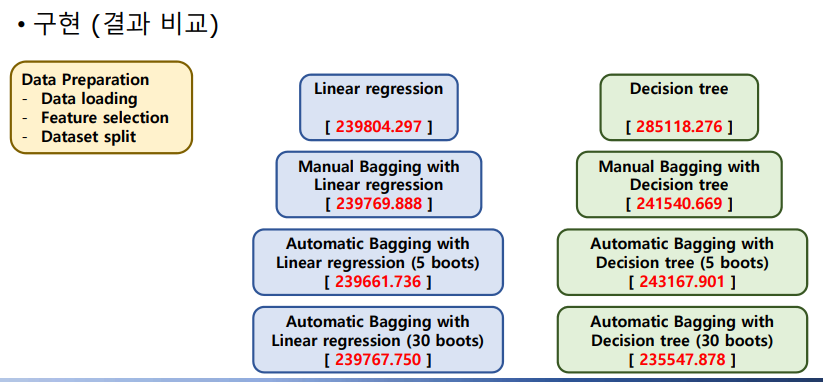

결론적으로 Decision tree가 Linear regression 보다 Bagging에 더 어울린다.
